# XGBoost代码实现1

sklearn并没有集成xgboost，使用前需用如下命令安装
pip install xgboost

In [1]:
import xgboost as xgb

#### 读取数据

XGBoost中数据形式可以是libsvm的，libsvm作用是对稀疏特征进行优化，看个例子：

```
1 101:1.2 102:0.03 
0 1:2.1 10001:300 10002:400
0 2:1.2 1212:21 7777:2
```
每行表示一个样本，每行开头0，1表示标签，而后面的则是特征索引：数值，其他未表示都是0.

我们以判断蘑菇是否有毒为例子来做后续的训练。数据集来自：http://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/ ，其中蘑菇有22个属性，将这些原始的特征加工后得到126维特征，并保存为libsvm格式，标签是表示蘑菇是否有毒。

In [2]:
data_train = xgb.DMatrix('data/agaricus.txt.train')
data_test = xgb.DMatrix('data/agaricus.txt.test')

[20:13:14] 6513x127 matrix with 143286 entries loaded from data/agaricus.txt.train
[20:13:14] 1611x127 matrix with 35442 entries loaded from data/agaricus.txt.test


#### 设置参数
 - eta：可看成学习率learning_rate。典型值一般设置为：0.01-0.2
 - gamma：分裂节点时，损失函数减小值只有大于等于gamma才分裂，gamma值越大，算法越保守，越不容易过拟合，但性能就不一定能保证，需要平衡。
 - objective
    - reg:linear：线性回归

    - reg:logistic：逻辑回归

    - binary:logistic 二分类的逻辑回归，返回预测的概率

    - binary:logitraw：二分类逻辑回归，输出是逻辑为0/1的前一步的分数

    - multi:softmax：用于Xgboost 做多分类问题，需要设置num_class（分类的个数）

    - multi:softprob：和softmax一样，但是返回的是每个数据属于各个类别的概率。

    - rank:pairwise：让Xgboost 做排名任务，通过最小化(Learn to rank的一种方法)
 - max_depth：决策树最大深度
 - silent：0 (silent), 1 (warning), 2 (info), 3 (debug)
 
 更多参数参见：https://xgboost.readthedocs.io/en/latest/parameter.html

In [3]:
param = {'max_depth':3,'eta':0.3,'silent':1,'objective':'binary:logistic'}
watchlist = [(data_test,'eval'),(data_train,'train')]
n_round = 6
model = xgb.train(param,data_train,num_boost_round=n_round,evals=watchlist)

[0]	eval-error:0.016139	train-error:0.014433
[1]	eval-error:0.016139	train-error:0.014433
[2]	eval-error:0.016139	train-error:0.014433
[3]	eval-error:0.009932	train-error:0.008598
[4]	eval-error:0	train-error:0.001228
[5]	eval-error:0	train-error:0.001228


#### 计算准确率

In [7]:
#预测概率
y_hat = model.predict(data_test)
#把概率转换为0,1分类
y_pred = y_hat.copy()
y_pred[y_pred>=0.5]=1
y_pred[y_pred<0.5]=0
#获取实际标签
y = data_test.get_label()
y_pred

array([0., 1., 0., ..., 1., 0., 1.], dtype=float32)

In [8]:
from sklearn.metrics import accuracy_score
print('accuracy_score=',accuracy_score(y,y_pred))

accuracy_score= 1.0


#### 画图

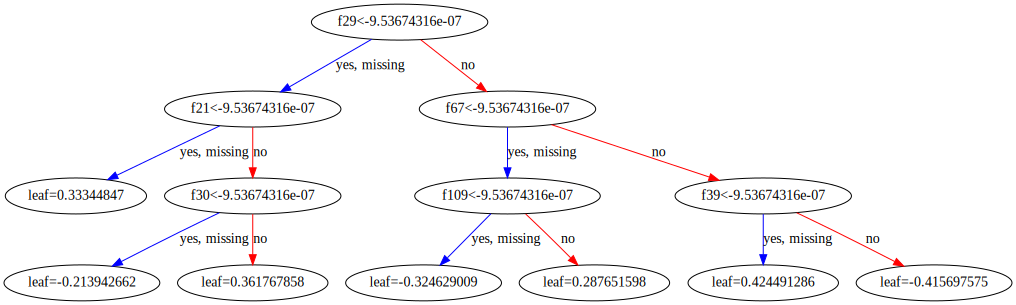

In [16]:
from matplotlib import pyplot
import graphviz
xgb.to_graphviz(model, num_trees=5 )
